In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv("Music//AB_NYC_2019.csv")
df.head(2)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [5]:
df.shape

(48895, 16)

In [6]:
df.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

### 1)Removing Outliers Using Percentile.

In [5]:
dfno1=df[df.price<=df.price.quantile(0.99)]
dfno1.shape

(48421, 16)

In [6]:
mint,maxt=df.price.quantile([0.01,0.999])
mint, maxt

(30.0, 3000.0)

In [7]:
dfno2=df[(df.price>mint)&(df.price<maxt)]
dfno2

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [8]:
dfno2.price.describe()

count    48183.000000
mean       148.772036
std        153.594795
min         31.000000
25%         70.000000
50%        110.000000
75%        179.000000
max       2999.000000
Name: price, dtype: float64

## Normal Distribution

### 2) Removing Outliers using Standard Deviation.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline


(array([3.911e+04, 7.797e+03, 1.129e+03, 3.850e+02, 1.760e+02, 9.100e+01,
        3.400e+01, 3.700e+01, 1.700e+01, 3.300e+01]),
 array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800., 2000.]),
 <BarContainer object of 10 artists>)

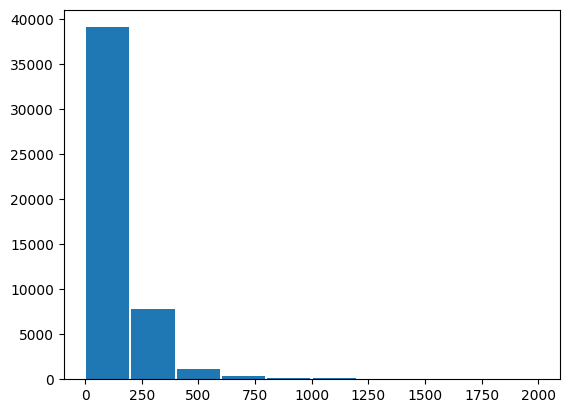

In [10]:
plt.hist(df.price, rwidth=0.95,bins=[0.,200.,400.,600.,800.,1000.,1200.,1400.,1600.,1800.,2000.])

In [11]:
mean=df.price.mean()
mean

152.7206871868289

In [12]:
std_deviation=df.price.std()
std_deviation

240.15416974718727

In [13]:
mean-3*std_deviation

-567.7418220547329

In [14]:
mean+3*std_deviation

873.1831964283906

In [15]:
dfno3=df[(df.price<873.18)&(df.price>-567.74)]
dfno3.shape

(48507, 16)

### 3) Using Z-score for outlier removal

In [16]:
df["zscore"]= (df.price-df.price.mean())/df.price.std()
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300970


In [17]:
dfno4=df[(df.zscore>-3)&(df.zscore<3)]
dfno4.shape

(48507, 17)

### 4)Using Logarithms for Outlier Removal

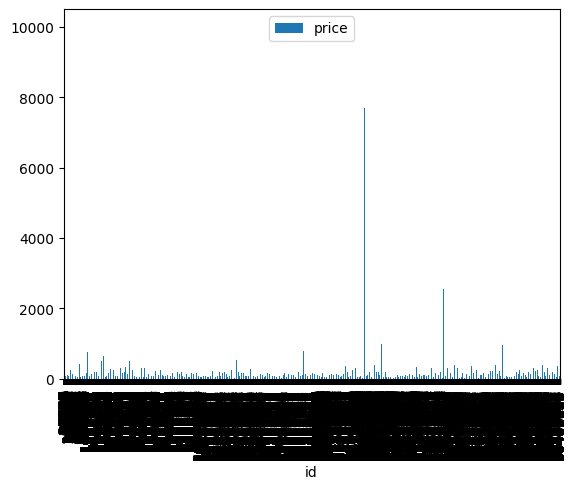

In [18]:
df.plot(x='id',y='price',kind='bar')
plt.show()

<Axes: xlabel='id'>

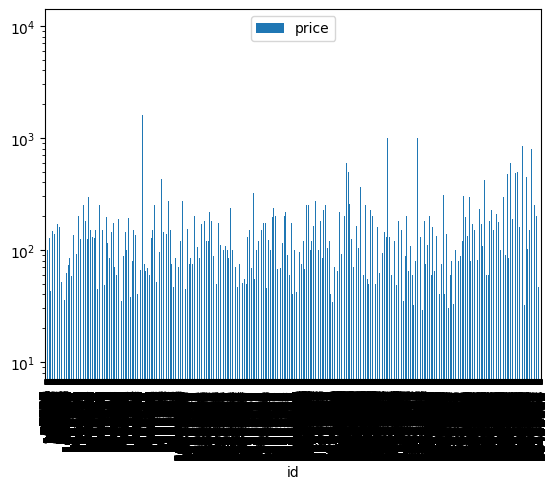

In [19]:
df.plot(x='id',y='price',kind='bar',logy=True)

<Axes: xlabel='id'>

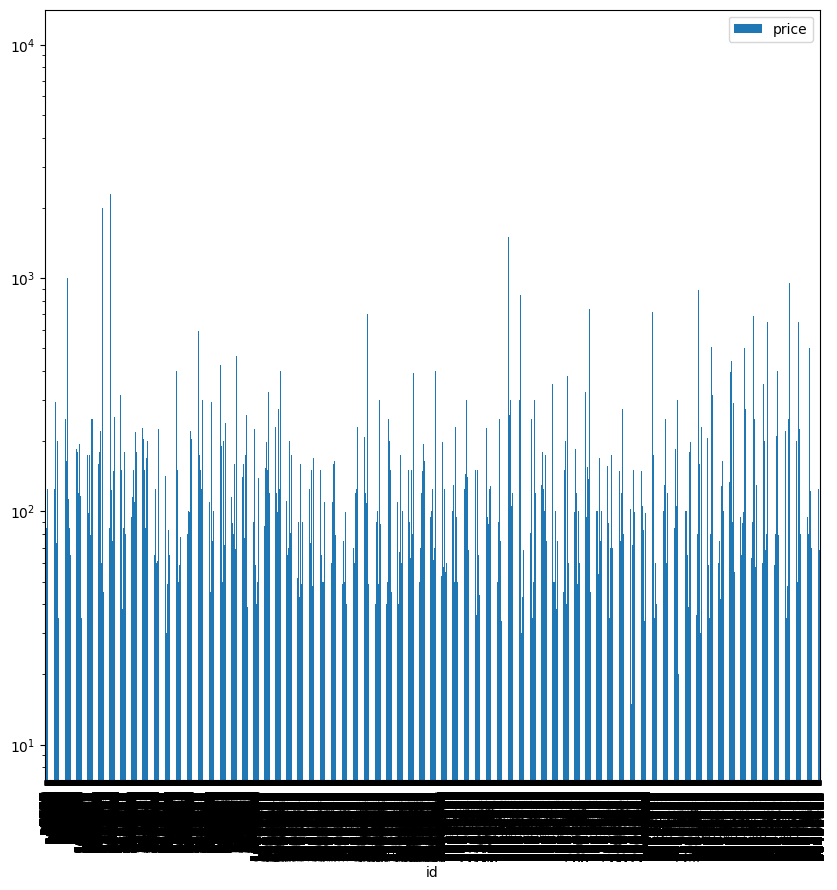

In [6]:
df.plot(x='id',y='price',kind='bar',logy=True, figsize=(10,10))

### 5)Using Modified Z-Score for Outlier Removal

In [7]:
mean=df.price.mean()
std=df.price.std()
mean, std

(152.7206871868289, 240.15416974718727)

In [8]:
df['zscore']=(df.price-mean)/std
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015493
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300970
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011329


### Outliers with Z-Score

In [17]:
dfo=df[(df.zscore<-3) | (df.zscore>3)]
dfo

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore,modified_zscore
496,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.77350,-73.98697,Entire home/apt,2000,30,30,2018-05-05,0.33,11,0,7.692056,27.771804
762,273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Manhattan,West Village,40.73301,-74.00268,Entire home/apt,1300,5,28,2018-09-25,0.31,4,297,4.777262,17.507674
946,363673,Beautiful 3 bedroom in Manhattan,256239,Tracey,Manhattan,Upper West Side,40.80142,-73.96931,Private room,3000,7,0,NaN,NaN,1,365,11.856048,42.434848
1105,468613,$ (Phone number hidden by Airbnb) weeks - room f,2325861,Cynthia,Manhattan,Lower East Side,40.72152,-73.99279,Private room,1300,1,0,NaN,NaN,1,0,4.777262,17.507674
1414,634353,Luxury 1Bed with Central Park Views,836168,Henry,Manhattan,Upper West Side,40.77428,-73.98594,Entire home/apt,1000,30,44,2015-09-28,0.53,11,364,3.528064,13.108761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48301,36186719,Private Bedroom in the Heart of Chelsea!,268920555,Terrence Jake,Manhattan,Chelsea,40.74531,-73.99454,Private room,999,30,0,NaN,NaN,1,270,3.523900,13.094098
48304,36189195,Next to Times Square/Javits/MSG! Amazing 1BR!,270214015,Rogelio,Manhattan,Hell's Kitchen,40.75533,-73.99866,Entire home/apt,2999,30,0,NaN,NaN,1,222,11.851884,42.420185
48305,36189257,2BR Near Museum Mile! Upper East Side!,272166348,Mary Rotsen,Manhattan,Upper East Side,40.78132,-73.95262,Entire home/apt,1999,30,0,NaN,NaN,1,270,7.687892,27.757141
48523,36308562,"Tasteful & Trendy Brooklyn Brownstone, near Train",217732163,Sandy,Brooklyn,Bedford-Stuyvesant,40.68767,-73.95805,Entire home/apt,1369,1,0,NaN,NaN,1,349,5.064577,18.519424


In [18]:
def get_mad(s):
    median=np.median(s)
    diff=abs(s-median)
    MAD=np.median(diff)
    return MAD
    

In [19]:
MAD=get_mad(df.price)
median=np.median(df.price)
MAD,median

(46.0, 106.0)

In [20]:
def get_modified_zscore(x,median,MAD):
    return 0.6745*(x-median)/MAD

In [21]:
get_modified_zscore(2000,median,MAD)

27.771804347826084

In [24]:
df["modified_zscore"]=df.price.apply(lambda x: get_modified_zscore(x,median,MAD))
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore,modified_zscore
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,-0.015493,0.630511
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300970,1.744902
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,-0.011329,0.645174
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,-0.265332,-0.249272
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,-0.302808,-0.381239


### Outliers with modified z-score

In [25]:
dfom=df[df.modified_zscore>3.5]
dfom

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zscore,modified_zscore
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,2018-11-03,0.12,1,180,0.925569,3.944359
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,2016-08-04,0.24,1,7,2.695266,10.176152
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,2019-05-18,0.55,2,243,1.446068,5.777239
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,2017-08-09,0.06,4,298,0.821469,3.577783
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,2018-12-30,0.24,2,216,1.029669,4.310935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,NaN,NaN,1,364,0.821469,3.577783
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,NaN,NaN,1,64,1.341968,5.410663
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,NaN,NaN,1,23,2.695266,10.176152
48842,36453160,LUXURY MANHATTAN PENTHOUSE+HUDSON RIVER+EMPIRE...,224171371,LuxuryApartmentsByAmber,Manhattan,Chelsea,40.75204,-74.00292,Entire home/apt,350,1,0,NaN,NaN,1,9,0.821469,3.577783


In [26]:
dfom.shape

(2916, 18)